In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 1.importing data

In [42]:
data = pd.read_csv("EastWestAirlines.csv")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### 2.1 getting data ready

In [43]:
data.info()               #gives information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [44]:
data.rename({'ID#': 'id'}, axis=1,inplace=True)
data.rename({'Award?': 'Award'}, axis=1,inplace=True)

In [45]:
data[data.duplicated()].shape       #checking no. of duplicate records

(0, 12)

In [46]:
data.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [47]:
#as given in problem, we have to assign values for column names - "cc1_miles" , "cc2_miles" , "cc3_miles" as follows :
#1 = under 5,000
#2 = 5,000 - 10,000
#3 = 10,001 - 25,000
#4 = 25,001 - 50,000
#5 = over 50,000

#for each case  : miles value can be anything in the range 0 to 5000; i have no idea; 
#lets take median value for each case

#1 = 2500
#2 = 7500
#3 = 17500
#4 = 37500
#5 = 75000

In [48]:
data['cc1_miles'].unique()
data['cc2_miles'].unique()
data['cc3_miles'].unique()

array([1, 3, 2, 4, 5], dtype=int64)

In [49]:
data['cc1_miles'] = data['cc1_miles'].replace([1,2,3,4,5],[2500,7500,17500,37500,75000])
data['cc2_miles'] = data['cc2_miles'].replace([1,2,3,4,5],[2500,7500,17500,37500,75000])
data['cc3_miles'] = data['cc3_miles'].replace([1,2,3,4,5],[2500,7500,17500,37500,75000])
data.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,2500,2500,2500,174,1,0,0,7000,0
1,2,19244,0,2500,2500,2500,215,2,0,0,6968,0
2,3,41354,0,2500,2500,2500,4123,4,0,0,7034,0
3,4,14776,0,2500,2500,2500,500,1,0,0,6952,0
4,5,97752,0,37500,2500,2500,43300,26,2077,4,6935,1


### 2.2 outliers detection

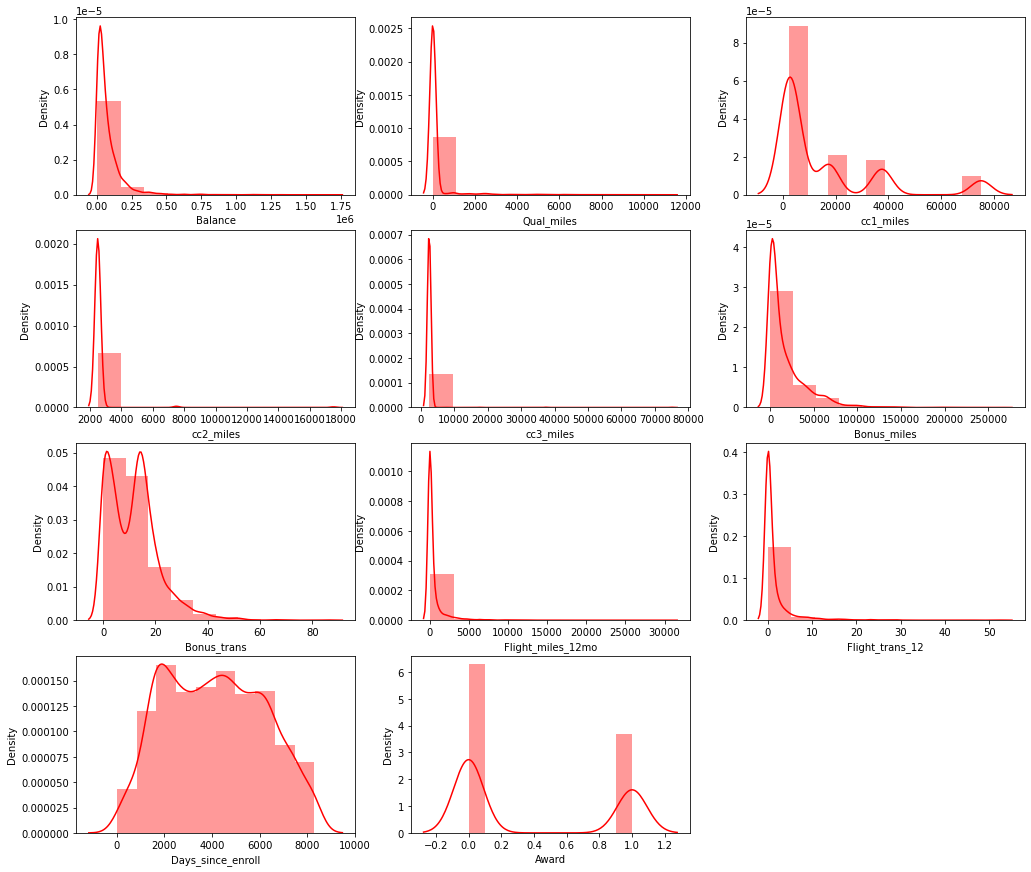

In [50]:
import seaborn as sns

plt.figure(figsize=(17,15)) 

plt.subplot(4,3,1)
sns.distplot(data['Balance'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,2)
sns.distplot(data['Qual_miles'],bins=10,  kde = True, color =  'red' )
plt.subplot(4,3,3)
sns.distplot(data['cc1_miles'],bins=10,  kde = True, color =  'red' )    
plt.subplot(4,3,4)
sns.distplot(data['cc2_miles'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,5)
sns.distplot(data['cc3_miles'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,6)
sns.distplot(data['Bonus_miles'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,7)
sns.distplot(data['Bonus_trans'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,8)
sns.distplot(data['Flight_miles_12mo'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,9)
sns.distplot(data['Flight_trans_12'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,10)
sns.distplot(data['Days_since_enroll'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,11)
sns.distplot(data['Award'],bins=10,  kde = True, color =  'red' )      


plt.show()

#for perfectly skewed N.D. kurtosis = 3

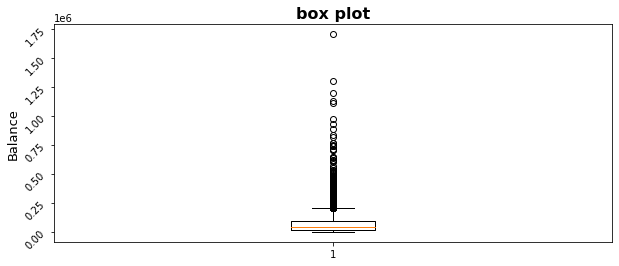

[array([18527.5,     0. ]), array([ 92404., 202636.])]

In [51]:
plt.figure(figsize=(10,4))                                                   #setting the frame using figure size
#figsize = plt.figaspect(9/6)                                                #setting the frame using aspect ratio
plt.title("box plot", fontsize = 16, fontweight = "bold")                    #title
plt.ylabel("Balance", fontsize = 13 )                                           #y-label
plt.yticks( rotation = 45, fontsize = 10)                                    #y-values rotation and font size


box=plt.boxplot(x='Balance', data=data)                                               
#box=plt.boxplot(x='Qual_miles', data=data)
#box=plt.boxplot(x='cc1_miles', data=data)
#box=plt.boxplot(x='cc2_miles', data=data)
#box=plt.boxplot(x='cc3_miles', data=data)
#box=plt.boxplot(x='Bonus_miles', data=data)
#box=plt.boxplot(x='Bonus_trans', data=data)
#box=plt.boxplot(x='Flight_miles_12mo', data=data)
#box=plt.boxplot(x='Flight_trans_12', data=data)
#box=plt.boxplot(x='Days_since_enroll', data=data)
#box=plt.boxplot(x='Award', data=data)

plt.show() 


[item.get_ydata() for item in box['whiskers']]


<AxesSubplot:xlabel='Award', ylabel='Balance'>

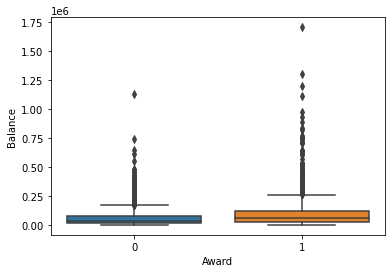

In [52]:
sns.boxplot(data=data,y="Balance",x="Award")

In [53]:
#print(np.where(data['Balance']>202636))                         #near about 265 outliers
# print(np.where(data['Qual_miles']>0))                           #near about 220 outliers
# print(np.where(data['cc1_miles']>37500))                        #near about 280 outliers
# print(np.where(data['cc2_miles']>2500))                         #near about 50 outliers
# print(np.where(data['cc3_miles']>2500))                         #near about 20 outliers
# print(np.where(data['Bonus_miles']>57505))                      #near about 250 outliers
# print(np.where(data['Bonus_trans']>38))                         #near about 80 outliers
# print(np.where(data['Flight_miles_12mo']>767))                  #near about 550 outliers
#print(np.where(data['Flight_trans_12']>2))                       #near about 550 outliers


#we get large no of outliers bcoz in year large group of people travel very few; while some other people are frequent travellers
#for frequent travellers flight transactions are more , miles travelled are more etc ...


#don't delete the record becoz of outliers ;
#also we don't want to have outliers
#so we replace these with median or mode or we can do quantile based flooring and capping

In [54]:
# Computing 90th percentile and replacing the outliers with 90th percentile
p_90 = np.percentile(data['Balance'], 90)
data.loc[data.Balance > p_90, 'Balance'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['Qual_miles'], 90)
data.loc[data.Qual_miles > p_90, 'Qual_miles'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['cc1_miles'], 90)
data.loc[data.cc1_miles > p_90, 'cc1_miles'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['cc2_miles'], 90)
data.loc[data.cc2_miles > p_90, 'cc2_miles'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['cc3_miles'], 90)
data.loc[data.cc3_miles > p_90, 'cc3_miles'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['Bonus_miles'], 90)
data.loc[data.Bonus_miles > p_90, 'Bonus_miles'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['Bonus_trans'], 90)
data.loc[data.Bonus_trans > p_90, 'Bonus_trans'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['Flight_miles_12mo'], 90)
data.loc[data.Flight_miles_12mo > p_90, 'Flight_miles_12mo'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['Flight_trans_12'], 90)
data.loc[data.Flight_trans_12 > p_90, 'Flight_trans_12'] = np.nan
data.fillna(p_90,inplace=True)

In [55]:
#replacing the outliers with median

# data.loc[data.Balance > 202636, 'Balance'] = np.nan
# data.fillna(43097,inplace=True)
# data.loc[data.Qual_miles > 0, 'Qual_miles'] = np.nan
# data.fillna(0,inplace=True)
# data.loc[data.cc1_miles > 37500, 'cc1_miles'] = np.nan
# data.fillna(2500,inplace=True)
# data.loc[data.cc2_miles > 2500, 'cc2_miles'] = np.nan
# data.fillna(2500,inplace=True)
# data.loc[data.cc3_miles > 2500, 'cc3_miles'] = np.nan
# data.fillna(2500,inplace=True)
# data.loc[data.Bonus_miles > 57505, 'Bonus_miles'] = np.nan
# data.fillna(7171,inplace=True)
# data.loc[data.Bonus_trans > 38, 'Bonus_trans'] = np.nan
# data.fillna(12,inplace=True)
# data.loc[data.Flight_miles_12mo > 767, 'Flight_miles_12mo'] = np.nan
# data.fillna(0,inplace=True)
# data.loc[data.Flight_trans_12 > 2, 'Flight_trans_12'] = np.nan
# data.fillna(0,inplace=True)

In [56]:
data.describe()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3999.000000,3999.0,3999.000000,3999.0,3999.0,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,60526.615154,0.0,12269.942486,2500.0,2500.0,14646.515629,10.754689,234.346087,0.770443,4118.55939,0.370343
std,1160.764358,51602.797668,0.0,13780.585584,0.0,0.0,16397.958541,7.641353,419.269051,1.340043,2065.13454,0.482957
min,1.000000,0.000000,0.0,2500.000000,2500.0,2500.0,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,18527.500000,0.0,2500.000000,2500.0,2500.0,1250.000000,3.000000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,43097.000000,0.0,2500.000000,2500.0,2500.0,7171.000000,12.000000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,92404.000000,0.0,17500.000000,2500.0,2500.0,23800.500000,17.000000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,164186.800000,0.0,37500.000000,2500.0,2500.0,48529.600000,23.000000,1246.000000,4.000000,8296.00000,1.000000


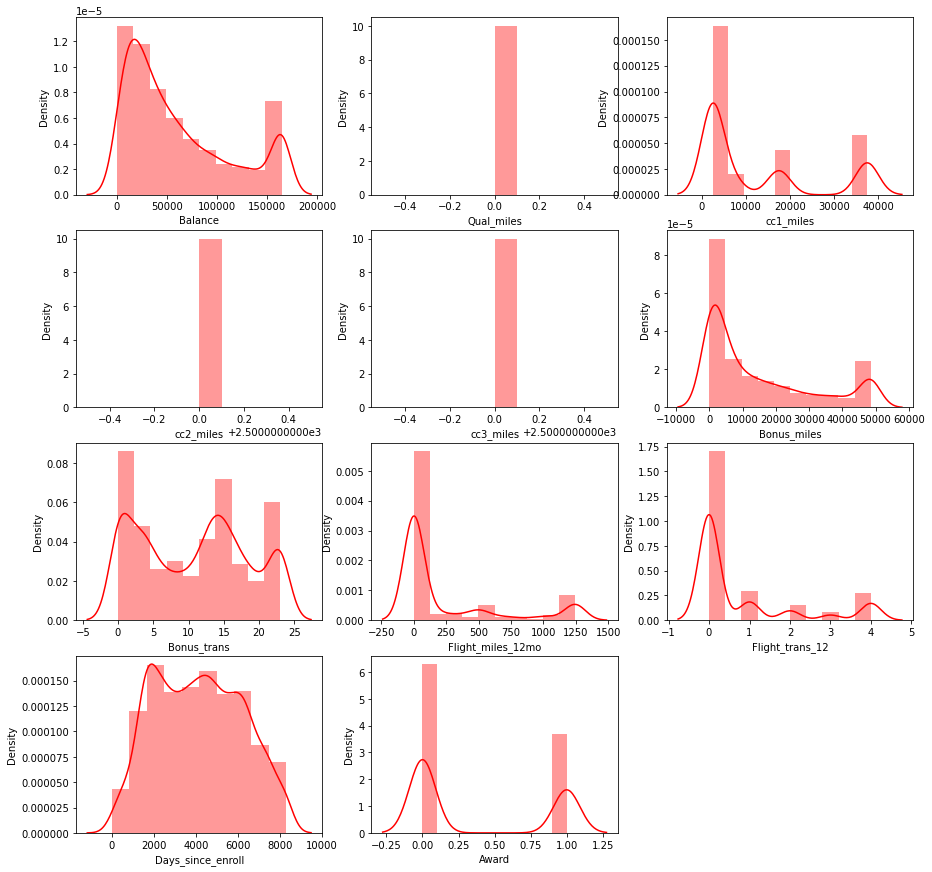

In [57]:
#now observe the distribution ********* after replacing outliers

plt.figure(figsize=(15,15)) 

plt.subplot(4,3,1)
sns.distplot(data['Balance'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,2)
sns.distplot(data['Qual_miles'],bins=10,  kde = True, color =  'red' )
plt.subplot(4,3,3)
sns.distplot(data['cc1_miles'],bins=10,  kde = True, color =  'red' )    
plt.subplot(4,3,4)
sns.distplot(data['cc2_miles'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,5)
sns.distplot(data['cc3_miles'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,6)
sns.distplot(data['Bonus_miles'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,7)
sns.distplot(data['Bonus_trans'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,8)
sns.distplot(data['Flight_miles_12mo'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,9)
sns.distplot(data['Flight_trans_12'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,10)
sns.distplot(data['Days_since_enroll'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,11)
sns.distplot(data['Award'],bins=10,  kde = True, color =  'red' )      


plt.show()

#for perfectly skewed N.D. kurtosis = 3

### 2.3 scaling of data

In [58]:
#we should normalize or standardize our data ?

# https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


In [59]:
# standardization of data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data.iloc[:,1:])
data_s=pd.DataFrame(x_scaled)
data_s.columns=['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']

data_s = pd.concat([data['id'],data_s],axis=1)
data_s.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,-0.627634,0.0,-0.709053,0.0,0.0,-0.882691,-1.276725,-0.559010,-0.575011,1.395454,-0.766919
1,2,-0.800107,0.0,-0.709053,0.0,0.0,-0.880190,-1.145842,-0.559010,-0.575011,1.379957,-0.766919
2,3,-0.371589,0.0,-0.709053,0.0,0.0,-0.641838,-0.884076,-0.559010,-0.575011,1.411920,-0.766919
3,4,-0.886703,0.0,-0.709053,0.0,0.0,-0.862808,-1.276725,-0.559010,-0.575011,1.372208,-0.766919
4,5,0.721473,0.0,1.831070,0.0,0.0,1.747600,1.602706,2.413201,2.410342,1.363975,1.303918


In [60]:
#normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(data.iloc[:,1:])
data_n=pd.DataFrame(x_scaled)
data_n.columns=['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']

data_n = pd.concat([data['id'],data_n],axis=1)
data_n.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,0.171408,0.0,0.0,0.0,0.0,0.003585,0.043478,0.0,0.0,0.843742,0.0
1,2,0.117208,0.0,0.0,0.0,0.0,0.004430,0.086957,0.0,0.0,0.839884,0.0
2,3,0.251872,0.0,0.0,0.0,0.0,0.084958,0.173913,0.0,0.0,0.847842,0.0
3,4,0.089995,0.0,0.0,0.0,0.0,0.010303,0.043478,0.0,0.0,0.837955,0.0
4,5,0.595371,0.0,1.0,0.0,0.0,0.892239,1.000000,1.0,1.0,0.835905,1.0


### 2.4 PCA

#### a) for standardized data

In [61]:
data_s1 = data_s.iloc[:,1:11]
data_s_array = data_s1.values                  #converting dataframe into array

In [62]:
from sklearn.decomposition import PCA

model = PCA(n_components = 10)
pca_values = model.fit_transform(data_s_array)

var = model.explained_variance_ratio_                    # The amount of variance that each PCA explains is 

cum_var = np.cumsum(np.round(var,decimals = 4)*100)         # Cumulative variance 
cum_var

array([ 46.16,  70.71,  84.12,  92.44,  98.03,  99.08, 100.  , 100.  ,
       100.  , 100.  ])

In [63]:
data_s_p = pd.concat([data_s['id'],pd.DataFrame(pca_values[:,0:5],columns=['PCA1','PCA2','PCA3','PCA4','PCA5'])],axis=1)
data_s_p.head()

,id,PCA1,PCA2,PCA3,PCA4,PCA5
0,1,-1.608605,-0.135300,1.719081,0.405025,-0.413348
1,2,-1.619509,-0.146896,1.640511,0.583351,-0.319045
2,3,-1.215574,-0.259212,1.673303,0.299381,-0.139802
3,4,-1.704563,-0.133177,1.635621,0.629875,-0.440501
4,5,4.376327,1.529912,0.260070,1.097760,-0.439401


#### b) for normalised data

In [64]:
data_n1 = data_n.iloc[:,1:11]
data_n_array = data_n1.values                  #converting dataframe into array

In [65]:
from sklearn.decomposition import PCA

model = PCA(n_components = 10)
pca_values = model.fit_transform(data_n_array)

var = model.explained_variance_ratio_                    # The amount of variance that each PCA explains is 

cum_var = np.cumsum(np.round(var,decimals = 4)*100)         # Cumulative variance 
cum_var

array([ 49.75,  76.12,  85.28,  91.82,  97.82,  99.06, 100.01, 100.01,
       100.01, 100.01])

In [66]:
data_n_p = pd.concat([data_n['id'],pd.DataFrame(pca_values[:,0:3],columns=['PCA1','PCA2','PCA3'])],axis=1)
data_n_p.head()

,id,PCA1,PCA2,PCA3
0,1,-0.607961,-0.058311,0.280750
1,2,-0.607473,-0.062945,0.229942
2,3,-0.483255,-0.082682,0.303970
3,4,-0.632875,-0.062443,0.216676
4,5,1.459002,0.601733,-0.135367


### 3.WCSS (finding optimum number of clusters)

#### a)for standardized data

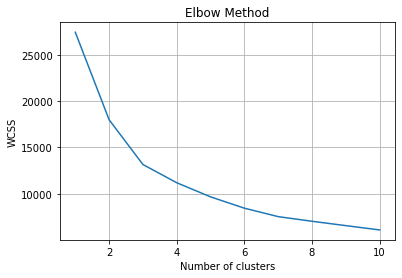

In [67]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(data_s_p.iloc[:,1:])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [68]:
#very slight change in WCSS value from k = 6 to 7 as compared to k = 1 to 2
#hence k = 6

#### b) for normalised data

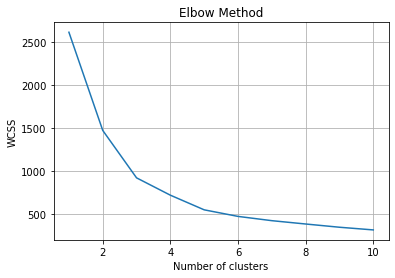

In [69]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(data_n_p.iloc[:,1:])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [70]:
#very slight change in WCSS value from k = 6 to 7 as compared to k = 1 to 2
#hence k = 6

In [71]:
# we are going forward with normalised data

### 4.Building cluster (K-means square)

In [86]:
from sklearn.cluster import KMeans
model = KMeans(6, random_state=42)

#model.fit(data_s_p.iloc[:,1:])             # a) model building using standardized data
model.fit(data_n_p.iloc[:,1:])            # b) model building using normalised data 

KMeans(n_clusters=6, random_state=42)

In [87]:
model.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [88]:
model.cluster_centers_                                           

array([[-0.56918237, -0.02725736, -0.0233751 ],
       [ 0.81845086, -0.54204464, -0.03550148],
       [ 0.20102963,  0.94964559, -0.01041457],
       [-0.00760921, -0.2186684 , -0.12610157],
       [ 0.0100519 , -0.06759208,  0.43949727],
       [ 1.27684842,  0.46350816, -0.12647408]])

In [89]:
#Assign clusters to the data set
data['cluster_id'] = model.labels_
data.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
0,1,28143.0,0.0,2500.0,2500.0,2500.0,174.0,1.0,0.0,0.0,7000,0,0
1,2,19244.0,0.0,2500.0,2500.0,2500.0,215.0,2.0,0.0,0.0,6968,0,0
2,3,41354.0,0.0,2500.0,2500.0,2500.0,4123.0,4.0,0.0,0.0,7034,0,0
3,4,14776.0,0.0,2500.0,2500.0,2500.0,500.0,1.0,0.0,0.0,6952,0,0
4,5,97752.0,0.0,37500.0,2500.0,2500.0,43300.0,23.0,1246.0,4.0,6935,1,5


In [90]:
data_count = data.groupby('cluster_id').agg(['count']).reset_index()
data_count

,cluster_id,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,count,count,count,count,count,count,count,count,count,count,count,count
0,0,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605
1,1,619,619,619,619,619,619,619,619,619,619,619,619
2,2,460,460,460,460,460,460,460,460,460,460,460,460
3,3,661,661,661,661,661,661,661,661,661,661,661,661
4,4,407,407,407,407,407,407,407,407,407,407,407,407
5,5,247,247,247,247,247,247,247,247,247,247,247,247


In [91]:
data.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2346.888474,24619.881620,0.0,2590.342679,2500.0,2500.0,2109.295327,4.148287,38.569470,0.147664,3487.293458,0.162617
1,1,1602.534733,97719.709208,0.0,37112.277868,2500.0,2500.0,41622.890468,17.378029,94.625202,0.310178,4863.137318,0.581583
2,2,2031.986957,75559.201739,0.0,3989.130435,2500.0,2500.0,8965.151304,11.586957,1054.941304,3.391304,4142.363043,0.547826
3,3,2285.157337,44081.727685,0.0,12696.671710,2500.0,2500.0,15975.720726,15.629349,44.462935,0.170953,3622.387292,0.414523
4,4,1196.469287,123586.152334,0.0,8347.665848,2500.0,2500.0,10790.992629,11.439803,97.014742,0.368550,5660.533170,0.329238
5,5,1483.287449,112743.745749,0.0,33653.846154,2500.0,2500.0,41884.910121,21.360324,1062.854251,3.356275,5097.202429,0.809717


<AxesSubplot:xlabel='cluster_id'>

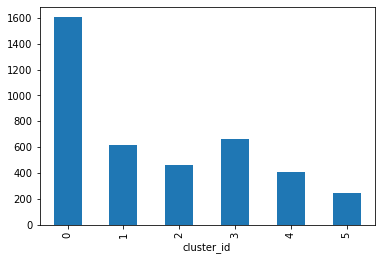

In [92]:
data.groupby('cluster_id').count()['id'].plot(kind='bar')